In [11]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [12]:
from cleaning_datasets import loading_dissected_datasets

In [7]:
df = loading_dissected_datasets(12, 12)

In [13]:
test_period = 30 #days
train_data = df[:df.shape[0]-test_period]["mean"]
test_data = df[df.shape[0]-test_period:]["mean"]

In [14]:
scaler = MinMaxScaler()
train_data = np.array(train_data).reshape(-1,1)
test_data = np.array(test_data).reshape(-1,1)

train_data = scaler.fit_transform(train_data)
train_data = train_data.reshape(-1)

test_data = scaler.transform(test_data).reshape(-1)

In [15]:
EMA = 0.0
gamma = 0.3
for ti in range(train_data.shape[0]):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

In [16]:
jump=1
lookback = 80
X_train,y_train = [],[]
for i in range(lookback,train_data.size,jump):
    X_train.append(train_data[i-lookback:i])
    y_train.append(train_data[i])
X_train,y_train = np.array(X_train),np.array(y_train)
 
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [18]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')

In [35]:
X_train.shape, y_train.shape

((255, 80, 1), (255, 1))

In [33]:
y_train = y_train.reshape(-1,1)

In [65]:
history = regressor.fit(X_train.reshape(-1,80), y_train)

/home/animesh/Projects/wind/pythonenv/lib64/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [45]:
df2 = loading_dissected_datasets(13, 12)

In [78]:
test_data = []
for i in range(1, 30):
    # print(len(df.iloc[-80-i:-i])
    test_data.append(df.iloc[-80-i:-i]["mean"].values.tolist())

In [80]:
predicted = regressor.predict(test_data)
predicted = scaler.inverse_transform(predicted.reshape(1,-1))

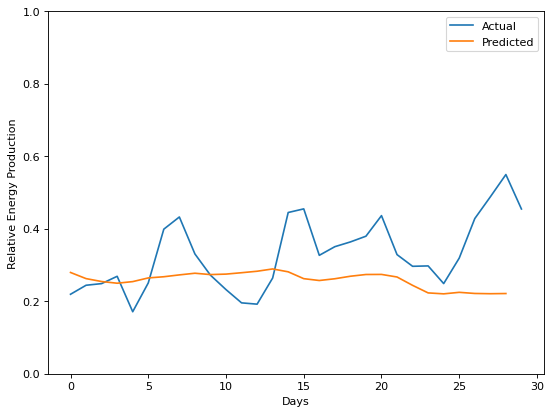

In [107]:
actual = df.iloc[-30:]["mean"].values.tolist()
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(actual, label="Actual")
plt.plot(predicted.reshape(-1), label="Predicted")
plt.ylim(0, 1)
plt.xlabel("Days")
plt.ylabel("Relative Energy Production")
plt.legend()

In [103]:
import sklearn
import math

mse = sklearn.metrics.mean_squared_error(actual[:-1], predicted.reshape(-1).tolist())

rmse = math.sqrt(mse)

In [104]:
rmse

0.1233790261367969

In [109]:
import statistics
statistics.stdev(predicted.reshape(-1).tolist())

0.021646195370366376